In [1]:
import torch
import torch_directml
import os
from torchvision import transforms
from PIL import Image
import numpy as np
from icecream import icecream

In [2]:
dml = torch_directml.device()
tensor1 = torch.tensor([1]).to(dml) # Note that dml is a variable, not a string!
tensor2 = torch.tensor([2]).to(dml)

In [3]:
dml_algebra = tensor1 + tensor2
dml_algebra.item()

3

In [4]:
ABS_PATH = os.path.abspath("")
DOWNLOAD_PATH = os.path.join(ABS_PATH, "downloads")


In [48]:
def preprocess_image(img):

    desired_size = (100,100)
    resize_transform = transforms.Resize(desired_size, antialias=True)
    resized_image = resize_transform(img)

    return resized_image

In [87]:
class CustomImageDataset(torch.utils.data.Dataset):

    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform

        self.img_paths = []
        self.img_label_path = []

        for root, _, files in os.walk(DOWNLOAD_PATH):
            if not root.endswith("split"):
                continue
            
            img_paths = [os.path.join(root, name) for name in files if name!="4.jpg"]
            self.img_paths.extend(img_paths)
            self.img_label_path.append(os.path.join(root, "4.jpg"))


    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        img_label_path = self.img_label_path[int(idx/9)]
        img = Image.open(img_path)
        img_label = Image.open(img_label_path)

        if self.transform:
            img = self.transform(img)
            img_label = self.transform(img_label)

        return img, img_label
    
dataset = CustomImageDataset(root_dir=DOWNLOAD_PATH, transform=preprocess_image)

In [89]:
img, label = dataset[21]

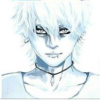

In [90]:
img

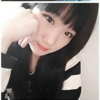

In [91]:
label